Explore how HL levels differ among retesters

# Defining the dataset

In [ ]:
import pandas as pd
labels_df = pd.read_excel('../DOD_clinical_labels_struct.xlsx')

In [ ]:
# Create a new df with the shape that we want
ids = []
visits = {}
for index, row in labels_df.iterrows():
	visit = str(row['ID'])[:-3] # First digit
	id = str(row['ID'])[-3:] # Last 3 digits
	hearing_level = (visit, row['Clinical Profile'], row['Military Profile'])
	
	if id not in visits.keys():
		visits[id] = []
	visits[id].append(hearing_level)

In [ ]:
visits

{'003': [('1', 'Normal Hearing', 'NH')],
 '004': [('1', 'Normal Hearing', 'NH')],
 '005': [('1', 'Normal Hearing', 'NH')],
 '006': [('1', 'Normal Hearing', 'H1')],
 '008': [('1', 'Normal Hearing', 'NH')],
 '009': [('1', 'Normal Hearing', 'NH')],
 '010': [('1', 'Normal Hearing', 'NH')],
 '011': [('1', 'Normal Hearing', 'H2')],
 '012': [('1', 'Normal Hearing', 'NH')],
 '013': [('1', 'Normal Hearing', 'NH')],
 '014': [('1', 'Normal Hearing', 'NH')],
 '015': [('1', 'Normal Hearing', 'NH')],
 '017': [('1', 'Normal Hearing', 'NH')],
 '018': [('1', 'Normal Hearing', 'NH')],
 '019': [('1', 'Normal Hearing', 'NH'),
  ('2', 'Normal Hearing', 'NH'),
  ('3', 'Normal Hearing', 'H1')],
 '021': [('1', 'Normal Hearing', 'NH')],
 '022': [('1', 'Normal Hearing', 'NH')],
 '023': [('1', 'Normal Hearing', 'NH')],
 '024': [('1', 'Normal Hearing', 'NH')],
 '025': [('1', 'Normal Hearing', 'NH')],
 '026': [('1', 'Normal Hearing', 'NH')],
 '027': [('1', 'Normal Hearing', 'NH')],
 '028': [('1', 'Normal Hearing',

In [ ]:
# Initialize a dataframe
final_df = pd.DataFrame({
	'ID' : [key for key in visits.keys()],
	'First Visit Clinical' : ['' for _ in range(len(visits.keys()))],
	'Second Visit Clinical' : ['' for _ in range(len(visits.keys()))], 
	'Third Visit Clinical' : ['' for _ in range(len(visits.keys()))],
	'First Visit Military' : ['' for _ in range(len(visits.keys()))],
	'Second Visit Military' : ['' for _ in range(len(visits.keys()))], 
	'Third Visit Military' : ['' for _ in range(len(visits.keys()))]
})

In [ ]:
for id, value in visits.items():
	for visit in value:
		time, clinical, military = visit
		if time == '1':
			final_df.loc[final_df['ID'] == id, 'First Visit Clinical'] = clinical
			final_df.loc[final_df['ID'] == id, 'First Visit Military'] = military
		elif time == '2':
			final_df.loc[final_df['ID'] == id, 'Second Visit Clinical'] = clinical
			final_df.loc[final_df['ID'] == id, 'Second Visit Military'] = military
		elif time == '3':
			final_df.loc[final_df['ID'] == id, 'Third Visit Clinical'] = clinical
			final_df.loc[final_df['ID'] == id, 'Third Visit Military'] = military
		

In [ ]:
final_df.to_csv('output_visits.xlsx')

# Analysis 

Two visit analysis

In [2]:
import pandas as pd
visits_df = pd.read_csv('output_visits.xlsx') # Change to read excel.
visits_df = visits_df.drop(columns=['Unnamed: 0'])

In [2]:
visits_df

,ID,First Visit Clinical,Second Visit Clinical,Third Visit Clinical,First Visit Military,Second Visit Military,Third Visit Military
0,3,Normal Hearing,NaN,NaN,NH,NaN,NaN
1,4,Normal Hearing,NaN,NaN,NH,NaN,NaN
2,5,Normal Hearing,NaN,NaN,NH,NaN,NaN
3,6,Normal Hearing,NaN,NaN,H1,NaN,NaN
4,8,Normal Hearing,NaN,NaN,NH,NaN,NaN
...,...,...,...,...,...,...,...
136,225,Normal Hearing,Normal Hearing,NaN,H1,NH,NaN
137,226,Mild Hearing Loss,Mild Hearing Loss,NaN,H3,H3,NaN
138,227,Normal Hearing,NaN,NaN,NH,NaN,NaN
139,229,Normal Hearing,NaN,NaN,NH,NaN,NaN


In [3]:
three_visit_df = visits_df.dropna()
two_visit_df = visits_df.drop(columns=['Third Visit Clinical', 'Third Visit Military']).dropna()

In [4]:
print(visits_df.info())
print(len(three_visit_df)) # Should be 13
print(len(two_visit_df)) # Should be 36

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     141 non-null    int64 
 1   First Visit Clinical   140 non-null    object
 2   Second Visit Clinical  37 non-null     object
 3   Third Visit Clinical   13 non-null     object
 4   First Visit Military   140 non-null    object
 5   Second Visit Military  37 non-null     object
 6   Third Visit Military   13 non-null     object
dtypes: int64(1), object(6)
memory usage: 7.8+ KB
None
13
36


In [4]:
two_visit_df

,ID,First Visit Clinical,Second Visit Clinical,First Visit Military,Second Visit Military
14,19,Normal Hearing,Normal Hearing,NH,NH
36,49,Normal Hearing,Normal Hearing,NH,NH
39,52,Normal Hearing,Normal Hearing,H2,H1
42,55,Normal Hearing,Normal Hearing,NH,H1
43,56,Normal Hearing,Normal Hearing,NH,NH
44,57,Normal Hearing,Normal Hearing,H1,NH
45,58,Normal Hearing,Normal Hearing,NH,NH
47,60,Normal Hearing,Normal Hearing,H2,H2
48,67,Normal Hearing,Normal Hearing,NH,NH
51,71,Normal Hearing,Normal Hearing,H1,H1


In [6]:
# Examine distributons of the data.
print(two_visit_df['First Visit Clinical'].value_counts())
print()
print(two_visit_df['Second Visit Clinical'].value_counts())
print()
print()
print(two_visit_df['First Visit Military'].value_counts())
print()
print(two_visit_df['Second Visit Military'].value_counts())

First Visit Clinical
Normal Hearing           31
Mild Hearing Loss         4
Moderate Hearing Loss     1
Name: count, dtype: int64

Second Visit Clinical
Normal Hearing       29
Mild Hearing Loss     7
Name: count, dtype: int64


First Visit Military
NH    12
H1    11
H3     8
H2     5
Name: count, dtype: int64

Second Visit Military
NH    16
H3     9
H1     6
H2     5
Name: count, dtype: int64


Here are some preliminary findings

In [6]:
# Translate the classifications into numbers that we can compare with > < and ==.
clinical_replace = {'Normal Hearing' : 1,
				 'Mild Hearing Loss' : 2, 
				 'Moderate Hearing Loss' : 3}
military_replace = {'NH' : 1,
					'H1' : 2,
					'H2' : 3,
					'H3' : 4}
# Essentially, higher classifications will be greater in magnitude.

In [10]:
# suppress warnings
pd.set_option('future.no_silent_downcasting', True)

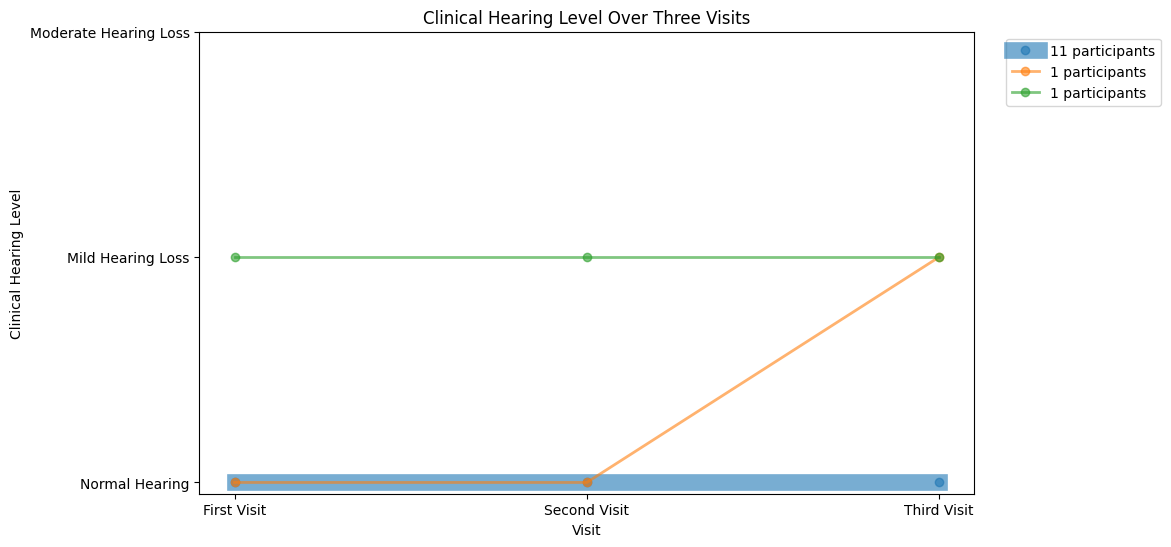

     ID First Visit Clinical Second Visit Clinical Third Visit Clinical
14   19       Normal Hearing        Normal Hearing       Normal Hearing
43   56       Normal Hearing        Normal Hearing       Normal Hearing
44   57       Normal Hearing        Normal Hearing       Normal Hearing
45   58       Normal Hearing        Normal Hearing       Normal Hearing
47   60       Normal Hearing        Normal Hearing       Normal Hearing
51   71       Normal Hearing        Normal Hearing       Normal Hearing
52   74       Normal Hearing        Normal Hearing       Normal Hearing
58   81       Normal Hearing        Normal Hearing       Normal Hearing
68   94       Normal Hearing        Normal Hearing       Normal Hearing
69   95       Normal Hearing        Normal Hearing    Mild Hearing Loss
72  100       Normal Hearing        Normal Hearing       Normal Hearing
80  114    Mild Hearing Loss     Mild Hearing Loss    Mild Hearing Loss
87  124       Normal Hearing        Normal Hearing       Normal 

In [76]:
# Here's a plot with time on the x-axis and HL classification on the y-axis.
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Convert clinical labels to numeric.
clinical_cols = ['ID', 'First Visit Clinical', 'Second Visit Clinical', 'Third Visit Clinical']
df = three_visit_df[clinical_cols].replace(clinical_replace)

# Counts
trajectories = df[['First Visit Clinical', 'Second Visit Clinical', 'Third Visit Clinical']].apply(tuple, axis=1)
trajectory_counts = Counter(trajectories)

# Create x-axis for visit time points
visit_labels = ['First Visit', 'Second Visit', 'Third Visit']

# Plot each patient's hearing levels across the three visits
plt.figure(figsize=(10, 6))
for traj, count in trajectory_counts.items():
    plt.plot(visit_labels,
             traj,
             marker='o',
             linewidth=1 + count,  # Thicker lines for common trajectories
             alpha=0.6,
             label=f'{count} participants',
             zorder=2  # Ensure lines sit above grid
             )

# Revert back from numeric to labels.
inv_replace = {v: k for k, v in clinical_replace.items()}
plt.yticks(sorted(inv_replace.keys()), [inv_replace[k] for k in sorted(inv_replace.keys())])

# Print the graph
plt.xlabel('Visit')
plt.ylabel('Clinical Hearing Level')
plt.title('Clinical Hearing Level Over Three Visits')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

# Let's also look at counts to double check our work
print(df.replace(inv_replace))

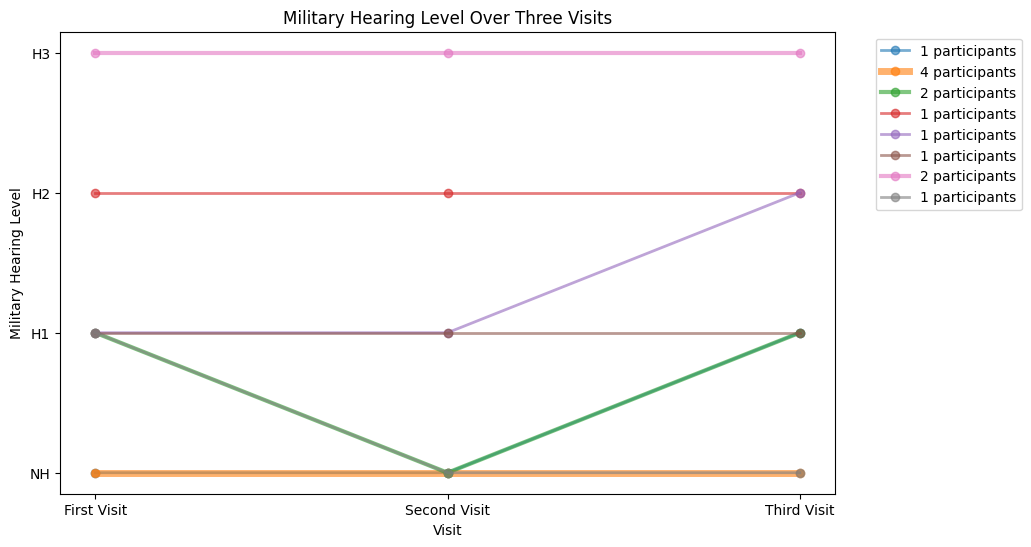

     ID First Visit Military Second Visit Military Third Visit Military
14   19                   NH                    NH                   H1
43   56                   NH                    NH                   NH
44   57                   H1                    NH                   H1
45   58                   NH                    NH                   NH
47   60                   H2                    H2                   H2
51   71                   H1                    H1                   H2
52   74                   H1                    NH                   H1
58   81                   NH                    NH                   NH
68   94                   H1                    H1                   H1
69   95                   H3                    H3                   H3
72  100                   H1                    NH                   NH
80  114                   H3                    H3                   H3
87  124                   NH                    NH              

In [78]:
# Here's a plot with time on the x-axis and HL classification on the y-axis.
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Convert military labels to numeric.
military_cols = ['ID', 'First Visit Military', 'Second Visit Military', 'Third Visit Military']
df = three_visit_df[military_cols].replace(military_replace)

# Counts
trajectories = df[['First Visit Military', 'Second Visit Military', 'Third Visit Military']].apply(tuple, axis=1)
trajectory_counts = Counter(trajectories)

# Create x-axis for visit time points
visit_labels = ['First Visit', 'Second Visit', 'Third Visit']

# Plot each patient's hearing levels across the three visits
plt.figure(figsize=(10, 6))
for traj, count in trajectory_counts.items():
    plt.plot(visit_labels,
             traj,
             marker='o',
             linewidth=1 + count,  # Thicker lines for common trajectories
             alpha=0.6,
             label=f'{count} participants',
             zorder=2  # Ensure lines sit above grid
             )

# Revert back from numeric to labels.
inv_replace = {v: k for k, v in military_replace.items()}
plt.yticks(sorted(inv_replace.keys()), [inv_replace[k] for k in sorted(inv_replace.keys())])

# Print the graph
plt.xlabel('Visit')
plt.ylabel('Military Hearing Level')
plt.title('Military Hearing Level Over Three Visits')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

# Let's also look at counts to double check our work
print(df.replace(inv_replace))

These plots will show the individual IDs with jitter.

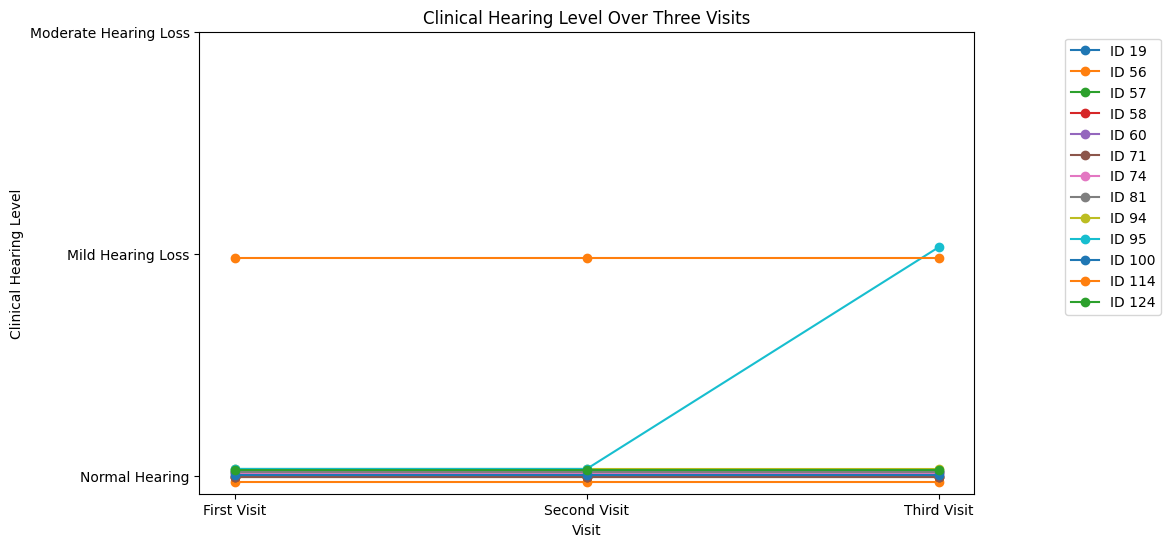

     ID First Visit Clinical Second Visit Clinical Third Visit Clinical
14   19       Normal Hearing        Normal Hearing       Normal Hearing
43   56       Normal Hearing        Normal Hearing       Normal Hearing
44   57       Normal Hearing        Normal Hearing       Normal Hearing
45   58       Normal Hearing        Normal Hearing       Normal Hearing
47   60       Normal Hearing        Normal Hearing       Normal Hearing
51   71       Normal Hearing        Normal Hearing       Normal Hearing
52   74       Normal Hearing        Normal Hearing       Normal Hearing
58   81       Normal Hearing        Normal Hearing       Normal Hearing
68   94       Normal Hearing        Normal Hearing       Normal Hearing
69   95       Normal Hearing        Normal Hearing    Mild Hearing Loss
72  100       Normal Hearing        Normal Hearing       Normal Hearing
80  114    Mild Hearing Loss     Mild Hearing Loss    Mild Hearing Loss
87  124       Normal Hearing        Normal Hearing       Normal 

In [18]:
# Here's a plot with time on the x-axis and HL classification on the y-axis.
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert clinical labels to numeric.
clinical_cols = ['ID', 'First Visit Clinical', 'Second Visit Clinical', 'Third Visit Clinical']
df = three_visit_df[clinical_cols].replace(clinical_replace)


# Create x-axis for visit time points
visit_labels = ['First Visit', 'Second Visit', 'Third Visit']
visit_to_x = {label: i for i, label in enumerate(visit_labels)}

# Plot each patient's hearing levels across the three visits
plt.figure(figsize=(10, 6))
for index, row in df.iterrows():
    x_values = [visit_to_x[visit] for visit in visit_labels]
    jittered_y = []
    jitter = np.random.uniform(-0.04, 0.04)
    for value in [row['First Visit Clinical'], row['Second Visit Clinical'], row['Third Visit Clinical']]:
        value += jitter
        jittered_y.append(value)        
    plt.plot(x_values, 
             jittered_y, 
             marker='o', 
             alpha=1, 
             label=f'ID {row["ID"]}',
             zorder=2)

# Revert back from numeric to labels.
inv_replace = {v: k for k, v in clinical_replace.items()}
plt.xticks(list(visit_to_x.values()), visit_labels)
plt.yticks(sorted(inv_replace.keys()), [inv_replace[k] for k in sorted(inv_replace.keys())])

# Print the graph
plt.xlabel('Visit')
plt.ylabel('Clinical Hearing Level')
plt.title('Clinical Hearing Level Over Three Visits')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

# Let's also look at counts to double check our work
print(df.replace(inv_replace))

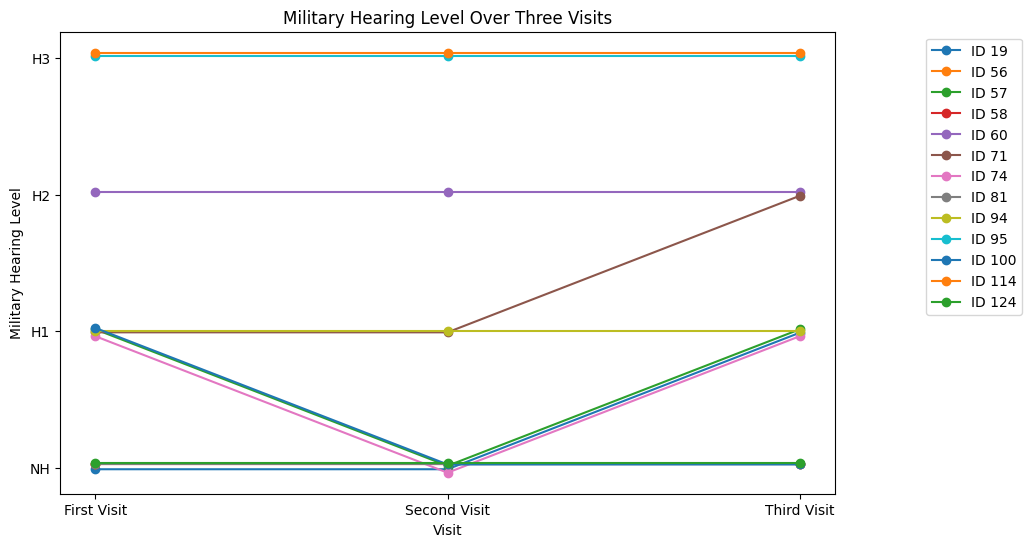

     ID First Visit Military Second Visit Military Third Visit Military
14   19                   NH                    NH                   H1
43   56                   NH                    NH                   NH
44   57                   H1                    NH                   H1
45   58                   NH                    NH                   NH
47   60                   H2                    H2                   H2
51   71                   H1                    H1                   H2
52   74                   H1                    NH                   H1
58   81                   NH                    NH                   NH
68   94                   H1                    H1                   H1
69   95                   H3                    H3                   H3
72  100                   H1                    NH                   NH
80  114                   H3                    H3                   H3
87  124                   NH                    NH              

In [25]:
# Here's a plot with time on the x-axis and HL classification on the y-axis.
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert Military labels to numeric.
military_cols = ['ID', 'First Visit Military', 'Second Visit Military', 'Third Visit Military']
df = three_visit_df[military_cols].replace(military_replace)


# Create x-axis for visit time points
visit_labels = ['First Visit', 'Second Visit', 'Third Visit']
visit_to_x = {label: i for i, label in enumerate(visit_labels)}

# Plot each patient's hearing levels across the three visits
plt.figure(figsize=(10, 6))
for index, row in df.iterrows():
    x_values = [visit_to_x[visit] for visit in visit_labels]
    jittered_y = []
    jitter = np.random.uniform(-0.04, 0.04)
    for value in [row['First Visit Military'], row['Second Visit Military'], row['Third Visit Military']]:
        value += jitter
        jittered_y.append(value)        
    plt.plot(x_values, 
             jittered_y, 
             marker='o', 
             alpha=1, 
             label=f'ID {row["ID"]}',
             zorder=2)

# Revert back from numeric to labels.
inv_replace = {v: k for k, v in military_replace.items()}
plt.xticks(list(visit_to_x.values()), visit_labels)
plt.yticks(sorted(inv_replace.keys()), [inv_replace[k] for k in sorted(inv_replace.keys())])

# Print the graph
plt.xlabel('Visit')
plt.ylabel('Military Hearing Level')
plt.title('Military Hearing Level Over Three Visits')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

# Let's also look at counts to double check our work
print(df.replace(inv_replace))

These are some preliminary graphs. Just to visualize the data -- I haven't done analysis on them yet.

Bar

Text(0.5, 1.0, 'Hearing level counts across visits')

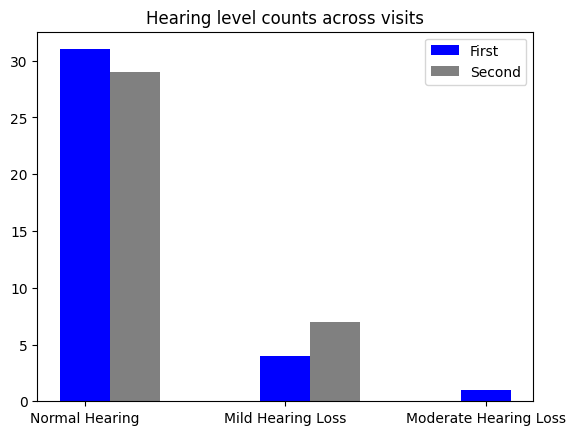

In [ ]:
# Temporary: Two visit plot, clinical ranges
from matplotlib import pyplot as plt
import numpy as np

width = 0.25
first_indices = np.arange(len(two_visit_df['First Visit Clinical'].value_counts().keys()))
second_indices = np.arange(len(two_visit_df['Second Visit Clinical'].value_counts().keys()))

y_first = two_visit_df['First Visit Clinical'].value_counts()
plt.bar(first_indices, y_first, width=width, color='blue', label='First')

y_second = two_visit_df['Second Visit Clinical'].value_counts()
plt.bar(second_indices + width, y_second, width=width, color='grey', label='Second')

plt.xticks(ticks=first_indices, labels=two_visit_df['First Visit Clinical'].value_counts().keys()) 

plt.legend()
plt.title("Hearing level counts across visits")

Text(0.5, 1.0, 'Military HL counts across visits')

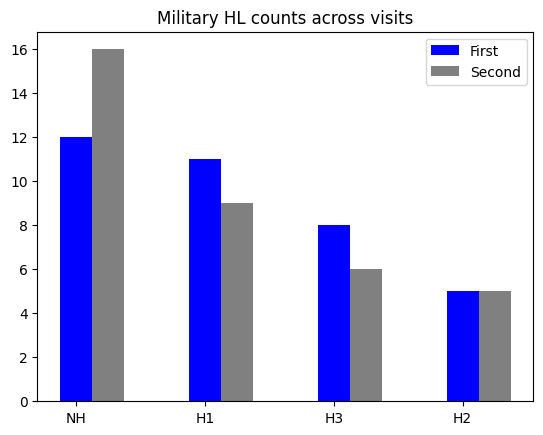

In [ ]:
# Temporary: Two visit plot, military ranges
from matplotlib import pyplot as plt
import numpy as np

width = 0.25
first_indices = np.arange(len(two_visit_df['First Visit Military'].value_counts().keys()))
second_indices = np.arange(len(two_visit_df['Second Visit Military'].value_counts().keys()))

y_first = two_visit_df['First Visit Military'].value_counts()
plt.bar(first_indices, y_first, width=width, color='blue', label='First')

y_second = two_visit_df['Second Visit Military'].value_counts()
plt.bar(second_indices + width, y_second, width=width, color='grey', label='Second')

plt.xticks(ticks=first_indices, labels=two_visit_df['First Visit Military'].value_counts().keys()) 

plt.legend()
plt.title("Military HL counts across visits")

Text(0.5, 1.0, 'Clinical HL counts across visits')

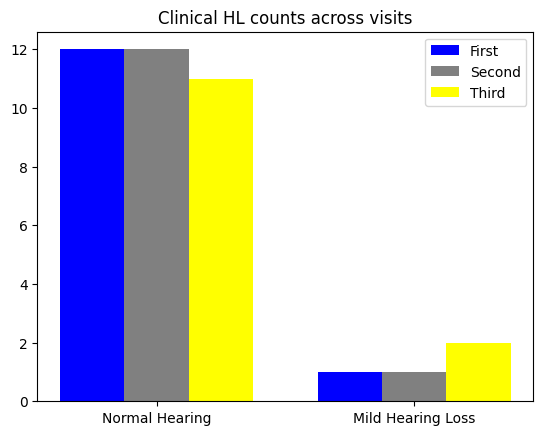

In [ ]:
# Temporary: Three visit plot, clinical ranges.
from matplotlib import pyplot as plt
import numpy as np

width = 0.25
first_indices = np.arange(len(three_visit_df['First Visit Clinical'].value_counts().keys()))
second_indices = np.arange(len(three_visit_df['Second Visit Clinical'].value_counts().keys()))
third_indicies = np.arange(len(three_visit_df['Second Visit Clinical'].value_counts().keys()))

y_first = three_visit_df['First Visit Clinical'].value_counts()
plt.bar(first_indices-width, y_first, width=width, color='blue', label='First')

y_second = three_visit_df['Second Visit Clinical'].value_counts()
plt.bar(second_indices, y_second, width=width, color='grey', label='Second')

y_third = three_visit_df['Third Visit Clinical'].value_counts()
plt.bar(third_indicies+width, y_third, width=width, color='yellow', label='Third')

plt.xticks(ticks=first_indices, labels=three_visit_df['First Visit Clinical'].value_counts().keys()) 

plt.legend()
plt.title("Clinical HL counts across visits")

Text(0.5, 1.0, 'Military HL counts across visits')

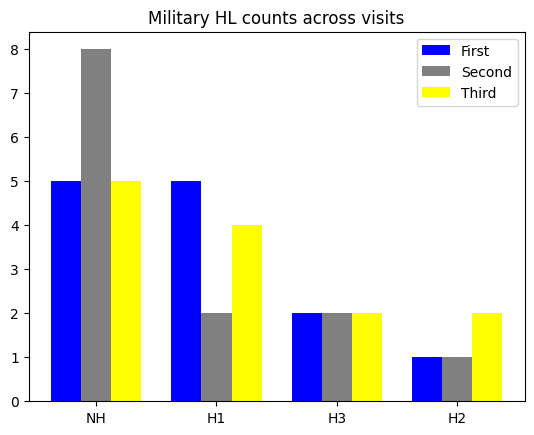

In [ ]:
# Temporary: Three visit plot, Military ranges.
from matplotlib import pyplot as plt
import numpy as np

width = 0.25
first_indices = np.arange(len(three_visit_df['First Visit Military'].value_counts().keys()))
second_indices = np.arange(len(three_visit_df['Second Visit Military'].value_counts().keys()))
third_indicies = np.arange(len(three_visit_df['Second Visit Military'].value_counts().keys()))

y_first = three_visit_df['First Visit Military'].value_counts()
plt.bar(first_indices-width, y_first, width=width, color='blue', label='First')

y_second = three_visit_df['Second Visit Military'].value_counts()
plt.bar(second_indices, y_second, width=width, color='grey', label='Second')

y_third = three_visit_df['Third Visit Military'].value_counts()
plt.bar(third_indicies+width, y_third, width=width, color='yellow', label='Third')

plt.xticks(ticks=first_indices, labels=three_visit_df['First Visit Military'].value_counts().keys()) 

plt.legend()
plt.title("Military HL counts across visits")